In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 02A-Tensorflow-PlayGround-Reimplementation

[Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4&seed=0.11537&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Classification Homepage

![](../references/tfplayground_classification.PNG)

## Datasets

| circle        | exclusive_or           | guassian  |  spiral |
| ------------- |:-------------:| -----:| ---:|
| ![](../references/tfplayground_circle.png) | ![](../references/tfplayground_exclusive_or.png) | ![](../references/tfplayground_gaussian.png) | ![](../references/tfplayground_spiral.png) |


## Features

* Start, pause, resume and reset training
    * Set max epochs
* Adjust Learning rate (+ Optimizer)
* Adjust activation (overall except last layer)
    * First layer activation option also
* Add Regularization (Overall all weights, [L1, L2])
    * Adjusting regularization rate
* Choose datasets - circle, exclusive_or, gaussian, spiral
    * Ratio of training to test data
    * Noise level
* Choose Features - $X_1, X_2, X_1^2, X_2^2, X_1X_2, \sin(X_1), \sin(X_2)$
* Choose architecture - no of hidden layers, no or neurons in each layer
* Monitor/Plot learning curves
* Monitor/Plot decision boundary
    * Option to show test data
    * Option to discretize output

TODO: [Add type hints](https://stackoverflow.com/questions/19202633/python-3-type-hinting-for-none#:~:text=import%20typing%20def%20foo(%20hello,str%5D%3DNone)%3A%20...&text=Or%20at%20least%2C%20it%20can,of%20up%20to%20the%20tools.
)

## Custom `TfPlayDataset`

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.tfplayground import TfPlayDataset
        
        

In [10]:
from tensorflow.keras import layers, losses, optimizers, regularizers
from src.visualize import plot_learning_curve, plot2d_decision_function, plot_confusion_matrix
import sklearn.datasets as skdata

## `TensorflowPlayground`

In [11]:
from src.tfplay import TensorflowPlayground

## Setup your playground!

In [14]:
tfp = TensorflowPlayground('circle', features=['X1', 'X2'], neurons=[8, 4], activation='sigmoid', learning_rate=0.1, scale=True)

## Plot the data!

<AxesSubplot:xlabel='X1', ylabel='X2'>

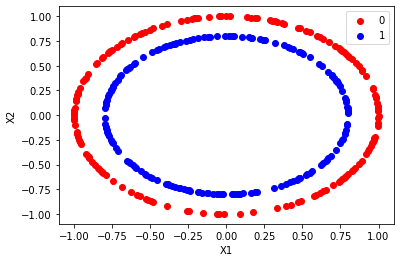

In [16]:
tfp.data.plot()

## Train the model!

In [17]:
tfp.train(epochs=15, batch_size=30)

Epoch 1/15
12/12 [==============================] - 1s 3ms/step - loss: 0.7062
Epoch 2/15
12/12 [==============================] - 0s 3ms/step - loss: 0.6944
Epoch 3/15
12/12 [==============================] - 0s 3ms/step - loss: 0.7057
Epoch 4/15
12/12 [==============================] - 0s 3ms/step - loss: 0.6963
Epoch 5/15
12/12 [==============================] - 0s 3ms/step - loss: 0.6937
Epoch 6/15
12/12 [==============================] - 0s 3ms/step - loss: 0.6931
Epoch 7/15
12/12 [==============================] - 0s 3ms/step - loss: 0.6909
Epoch 8/15
12/12 [==============================] - 0s 3ms/step - loss: 0.6891
Epoch 9/15
12/12 [==============================] - 0s 3ms/step - loss: 0.6931
Epoch 10/15
12/12 [==============================] - 0s 3ms/step - loss: 0.6960
Epoch 11/15
12/12 [==============================] - 0s 5ms/step - loss: 0.6851
Epoch 12/15
12/12 [==============================] - 0s 3ms/step - loss: 0.6787
Epoch 13/15
12/12 [==============================

## Plot the learning curve!

(<Figure size 432x288 with 1 Axes>,
 array([<AxesSubplot:title={'center':'loss'}>], dtype=object))

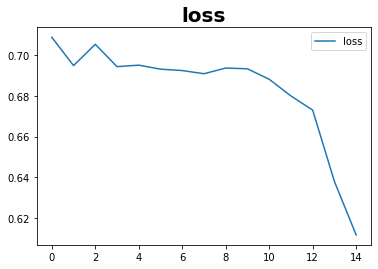

In [18]:
tfp.plot_learning_curve()

## Plot the predictions!

No handles with labels found to put in legend.


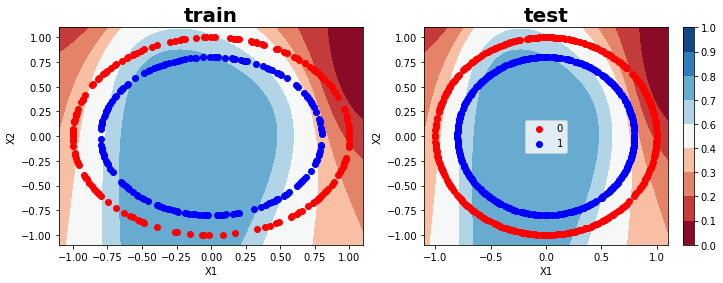

In [19]:
fig, axn = plt.subplots(1, 2, figsize=(12, 4))

for ax, subset in zip(axn, ['train', 'test']):
    cp = tfp.plot_decision_function(ax=ax)
    tfp.data.plot(subset=subset, ax=cp.axes)
    
    ax.set_title(subset, fontdict=dict(weight='bold', size=20))
    

fig.colorbar(cp)

## Analyze the performance!

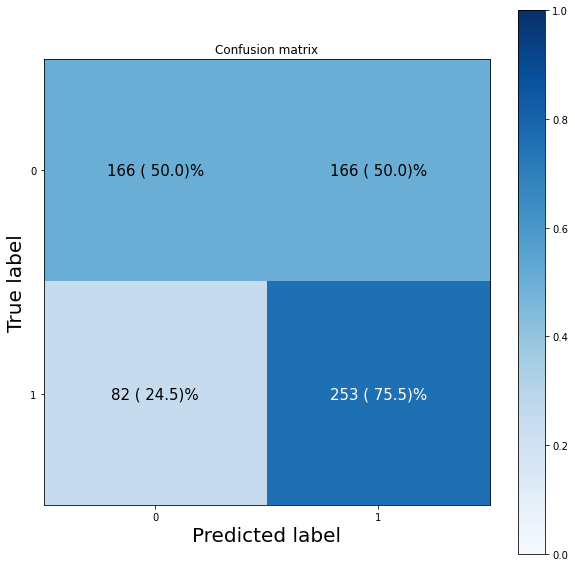

In [20]:
tfp.plot_confusion_matrix();